IMPORT LIBRARIES

In [ ]:
from data_visualizer import DataVisualizer
#!pip install ultralytics
#!pip install roboflow
from roboflow import Roboflow
from ultralytics import YOLO
import torch
import shutil
import glob
import sys
sys.path.append('../')
from api_key import dataset_key

LOAD ROBOFLOW DATASET

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key=dataset_key)
project = rf.workspace("computervision-jifim").project("hockey-playerdetection")
version = project.version(7)
dataset = version.download("yolov8")  

loading Roboflow workspace...
loading Roboflow project...


INSPECT DATASET

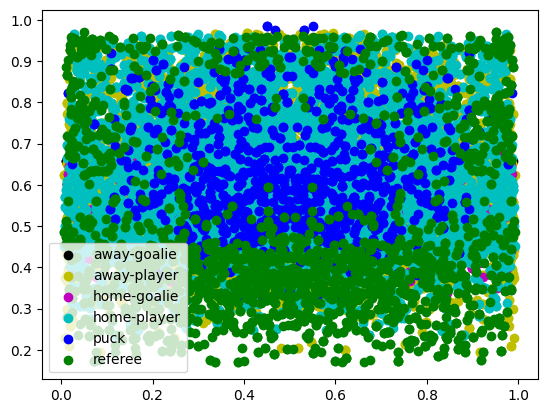

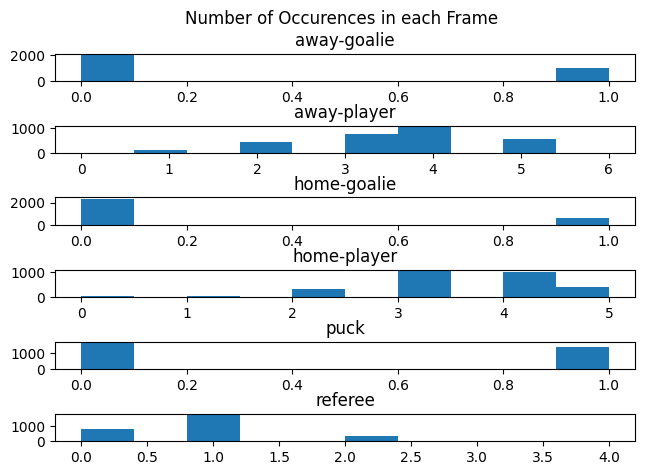

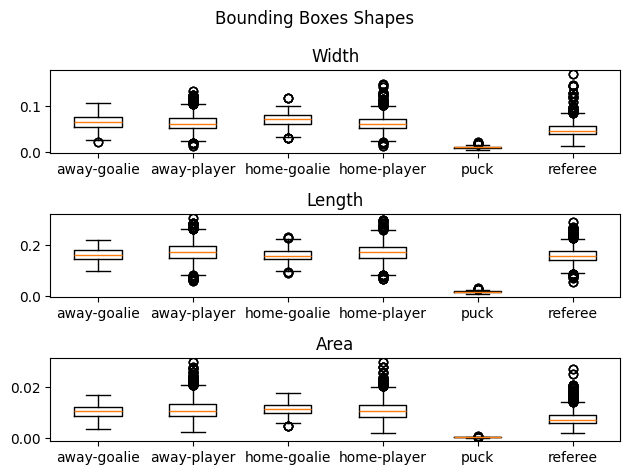

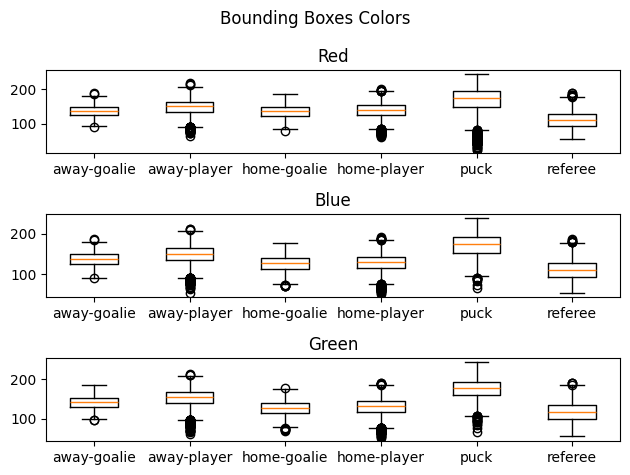

In [3]:
data = DataVisualizer(dataset.location)
data.plotBoxLocation('train')
data.plotBoxCounts('train')
data.plotBoxSize('train')
data.plotBoxColor('train')

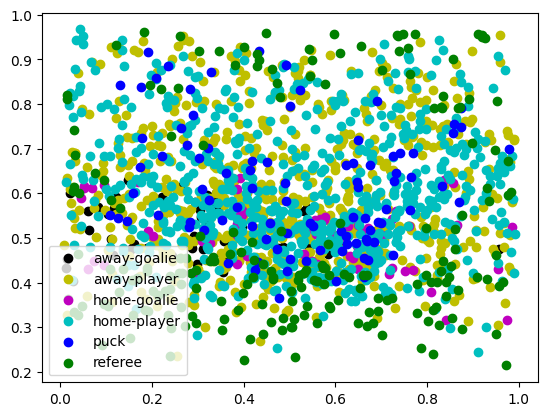

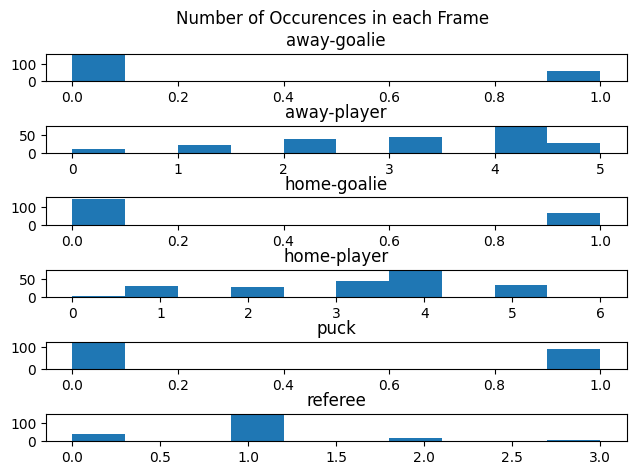

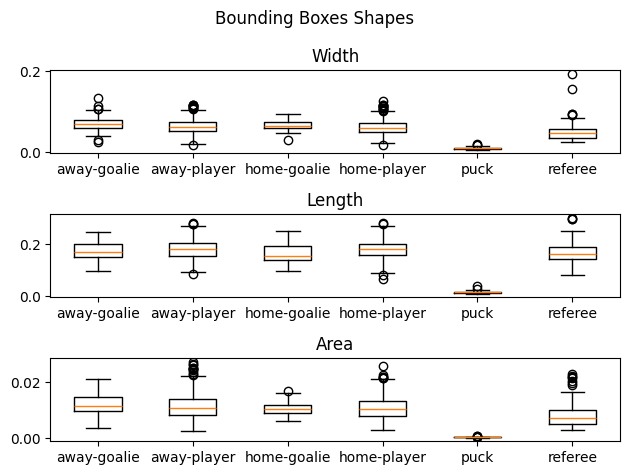

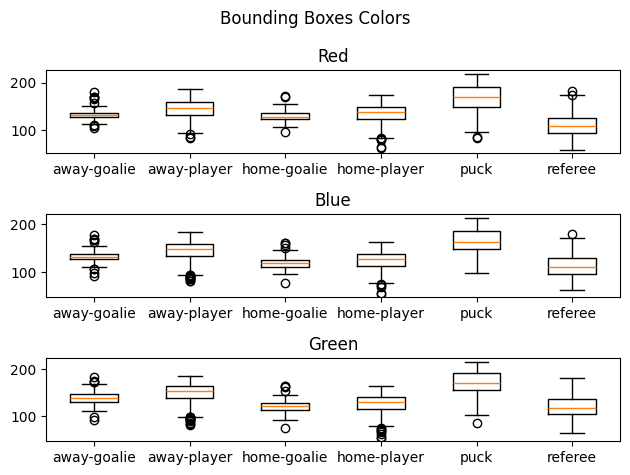

In [4]:
data = DataVisualizer(dataset.location)
data.plotBoxLocation('valid')
data.plotBoxCounts('valid')
data.plotBoxSize('valid')
data.plotBoxColor('valid')

TRAIN YOLO ON DATASET

In [ ]:
#clear cache
torch.cuda.empty_cache()
#set path to dataset
path = dataset.location+'/data.yaml'
#Load model
model = YOLO("yolov8l.pt")

In [ ]:
#calculate optimal hyperparameters
calc_optimal_hyper_param = False
epochs = 10
iterations = 20

if (calc_optimal_hyper_param):
    model.tune(data=path,
               epochs=epochs,
               iterations=iterations,
               optimizer="AdamW")

    dirs = glob.glob('./runs/detect/tune*')
    folder = sorted(dirs)[-1]
    print(folder)
    shutil.copy(folder+'/best_hyperparameters.yaml', './drive/MyDrive/Colab Notebooks/nhl_player_tracker/best_hyperparameters.yaml')

In [ ]:
#train model
epochs = 50
image_size = 640
hyperparameter_path = "./drive/MyDrive/Colab Notebooks/nhl_player_tracker/best_hyperparameters.yaml"

if (calc_optimal_hyper_param):
    results = model.train(data=path, epochs=epochs, imgsz=image_size, cfg=hyperparameter_path, optimizer="AdamW", seed=42)
else:
    results = model.train(data=path, epochs=epochs, imgsz=image_size, optimizer="AdamW", seed=42)

dirs = glob.glob('./runs/detect/train*')
folder = sorted(dirs)[-1]
print(folder)
shutil.copy(folder+'/weights/best.pt', './drive/MyDrive/Colab Notebooks/nhl_player_tracker/best.pt')
shutil.copy(folder+'/weights/last.pt', './drive/MyDrive/Colab Notebooks/nhl_player_tracker/last.pt')